In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
rawdf = pd.read_csv('/content/sample_data/analysisoutput.csv')

In [ ]:
rawdf


,Unnamed: 0,p_id,name,price,colour,brand,ratingCount,avg_rating,Occasion,Border,Fabric,Ornamentation,Pattern,Print or Pattern Type,Sustainable,Technique,Wash Care,Wedding,AddOns
0,0,1518329,Dupatta Bazaar White Embroidered Chiffon Dupatta,899,White,dupatta bazaar,1321,4.548827,Daily,NaN,NaN,NaN,Embroidered,Floral,NaN,NaN,NaN,NaN,NaN
1,1,10711448,Dupatta Bazaar Women White Solid Dupatta,599,White,dupatta bazaar,1531,4.536251,Daily,Taping,Poly Chiffon,NaN,Solid,Solid,NaN,NaN,Hand Wash,NaN,NaN
2,2,14964708,Dupatta Bazaar Orange & Green Dyed Art Silk Ba...,899,Orange,dupatta bazaar,30,4.366667,Daily,Woven Design,Art Silk,NaN,Dyed,Bandhani,Regular,Bandhani,Machine Wash,NaN,NaN
3,3,13552234,Dupatta Bazaar Black Solid Dupatta,599,Black,dupatta bazaar,232,4.547414,Daily,Solid,Poly Chiffon,NaN,Solid,Solid,Regular,NaN,Machine Wash,NaN,NaN
4,4,17663032,Dupatta Bazaar Women's Solid Orange Dupatta,599,Orange,dupatta bazaar,0,0.000000,Party,Woven Design,Poly Chiffon,NaN,Solid,Solid,Regular,NaN,Machine Wash,Guests & Gifting,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14263,14263,16630130,SHIVANGI clothing Girls Red & White Printed Re...,1595,Red,shivangi clothing,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,Regular,NaN,NaN,NaN,NaN
14264,14264,18395182,ARTICALE Women Off White Solid Slim Fit Cotton...,1699,Off White,articale,0,0.000000,Casual,NaN,Cotton,NaN,Solid,Solid,Regular,NaN,Hand Wash,NaN,NaN
14265,14265,18395164,ARTICALE Women Lavender Slim Fit Shorts,1699,Lavender,articale,0,0.000000,Casual,NaN,Cotton,NaN,Solid,Solid,Regular,NaN,Hand Wash,NaN,NaN
14266,14266,2117164,Noi Cream-Coloured & Brown Printed Shawl,1999,Cream,noi,5,3.400000,Daily,Printed,Wool,Other,Printed,Animal,NaN,NaN,NaN,NaN,NaN


In [ ]:
maindf=rawdf[['price','colour','Fabric']].copy()
maindf=maindf.dropna()
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# select the features that you want to cluster
X = maindf[['colour', 'Fabric', 'price']]

# apply one-hot encoding to the colour and Fabric features
one_hot_encoder = OneHotEncoder(categories='auto')
X_one_hot = one_hot_encoder.fit_transform(X[['colour', 'Fabric']])
# scale the price feature
scaler = MinMaxScaler()
price_scaled = scaler.fit_transform(X[['price']])

# concatenate the one-hot encoded features and the scaled price feature
X_scaled = pd.concat([pd.DataFrame(X_one_hot.toarray()), pd.DataFrame(price_scaled)], axis=1)

# create a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3)

# fit the model to the data and predict the clusters
y_pred = kmeans.fit_predict(X_scaled)
# add the predicted clusters back to the dataframe
maindf['cluster'] = y_pred

In [ ]:
maindf1=maindf[['colour','Fabric','cluster']].copy()

In [ ]:
maindf1

,colour,Fabric,cluster
1,White,Poly Chiffon,0
2,Orange,Art Silk,0
3,Black,Poly Chiffon,0
4,Orange,Poly Chiffon,0
5,Maroon,Poly Chiffon,0
...,...,...,...
14259,Blue,Cotton,1
14264,Off White,Cotton,1
14265,Lavender,Cotton,1
14266,Cream,Wool,0


In [ ]:
maindf1=maindf1.sample(n=20)

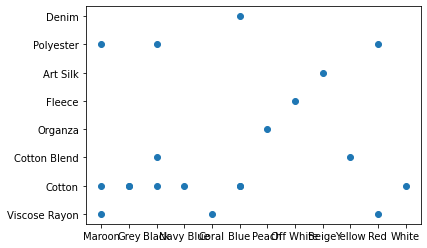

In [ ]:
plt.scatter(maindf1['colour'],maindf1['Fabric'])

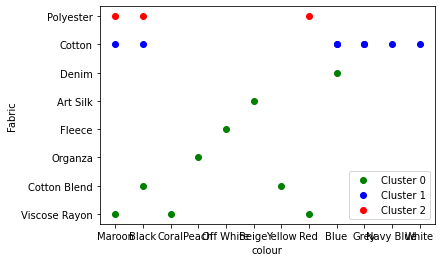

In [ ]:
df_c0= maindf1[maindf1.cluster==0]
df_c1=maindf1[maindf1.cluster==1]
df_c2=maindf1[maindf1.cluster==2]

plt.scatter(df_c0['colour'], df_c0['Fabric'], label='Cluster 0', color='green')
plt.scatter(df_c1['colour'], df_c1['Fabric'], label='Cluster 1',color='blue')
plt.scatter(df_c2['colour'], df_c2['Fabric'], label='Cluster 2',color='red')

plt.xlabel('colour')
plt.ylabel('Fabric')
plt.legend()